# Lab10a 3 kinds of learning 2019-04-11

In [1]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use(['ggplot', 'seaborn-poster'])

# Supervised Learning
## k Nearest Neighbors

In [2]:
from sklearn.neighbors import KNeighborsRegressor

In [3]:
X  = np.random.uniform(low=-np.pi, high=np.pi, size=(100,1))
XT = np.random.uniform(low=-np.pi, high=np.pi, size=(100,1))

y  = np.sin(X ) + np.random.normal(scale=0.1, size=(100,1))
yT = np.sin(XT) + np.random.normal(scale=0.1, size=(100,1))

## let's try it first without "interact" python widget:

1.26974045529


<IPython.core.display.Javascript object>


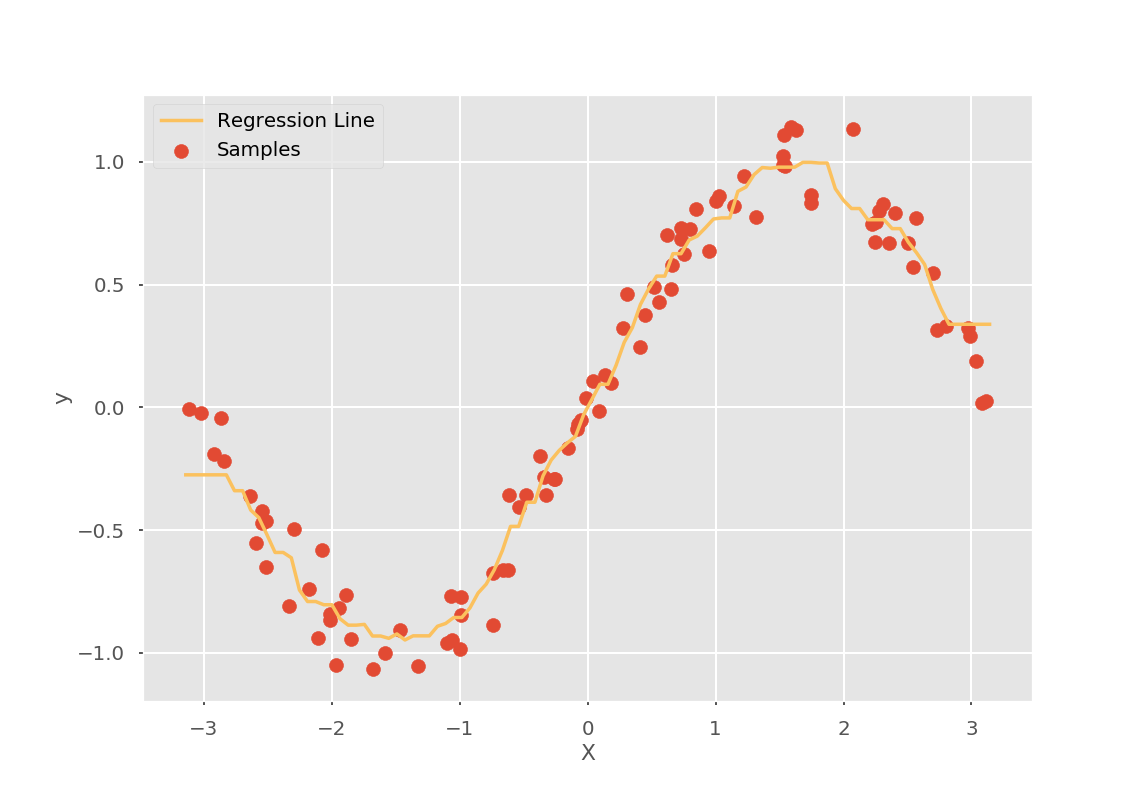

Text(0,0.5,'y')

In [12]:
x=7;
try:
    axes.lines[0].remove()
except:
    pass
knr = KNeighborsRegressor(n_neighbors=x); 
knr.fit(X, y)
xs = np.linspace(-np.pi, np.pi, 100)[:, None]; ys = knr.predict(xs)
print(np.linalg.norm(knr.predict(XT)-yT))


fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(xs, ys, label='Regression Line')
axes.legend();
axes.scatter(X, y, label='Samples')
axes.set_xlabel('X')
axes.set_ylabel('y')

## if you're running locally, try with the interaction

In [13]:
@interact(x=(1, 10))
def kNN(x=5):
    # use x as n_neighbors parameter
    try:
        axes.lines[0].remove()
    except:
        pass
    knr = KNeighborsRegressor(n_neighbors=x); knr.fit(X, y)
    xs = np.linspace(-np.pi, np.pi, 100)[:, None]; ys = knr.predict(xs)
    print(np.linalg.norm(knr.predict(XT)-yT))
    axes.plot(xs, ys, label='Regression Line')
    axes.legend()

A Jupyter Widget

# Unsupervised Learning
## k Means

In [14]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [15]:
# use 2 features from the iris dataset, just for fun
X = load_iris().data[:, :2]

In [16]:
def plot_kmeans(x, means_plot=None):
    try:
        axes.images[0].remove()
        means_plot.remove()
    except:
        pass
    km = KMeans(n_clusters=x); km.fit(X)
    # plot what each region would be labelled as
    x = np.linspace(X[:,0].min(), X[:,0].max(), 1000); y = np.linspace(X[:,1].min(), X[:,1].max(), 1000); 
    xs, ys = np.meshgrid(x, y)
    zs = km.predict(np.asarray([xs.flatten(), ys.flatten()]).T)
    axes.imshow(zs.reshape(xs.shape), extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap=plt.cm.Set3)
    # plot centroids
    means = km.cluster_centers_
    means_plot = axes.scatter(means[:,0], means[:,1], s=200, marker='x', c='w', linewidths=5)
    return means_plot

<IPython.core.display.Javascript object>


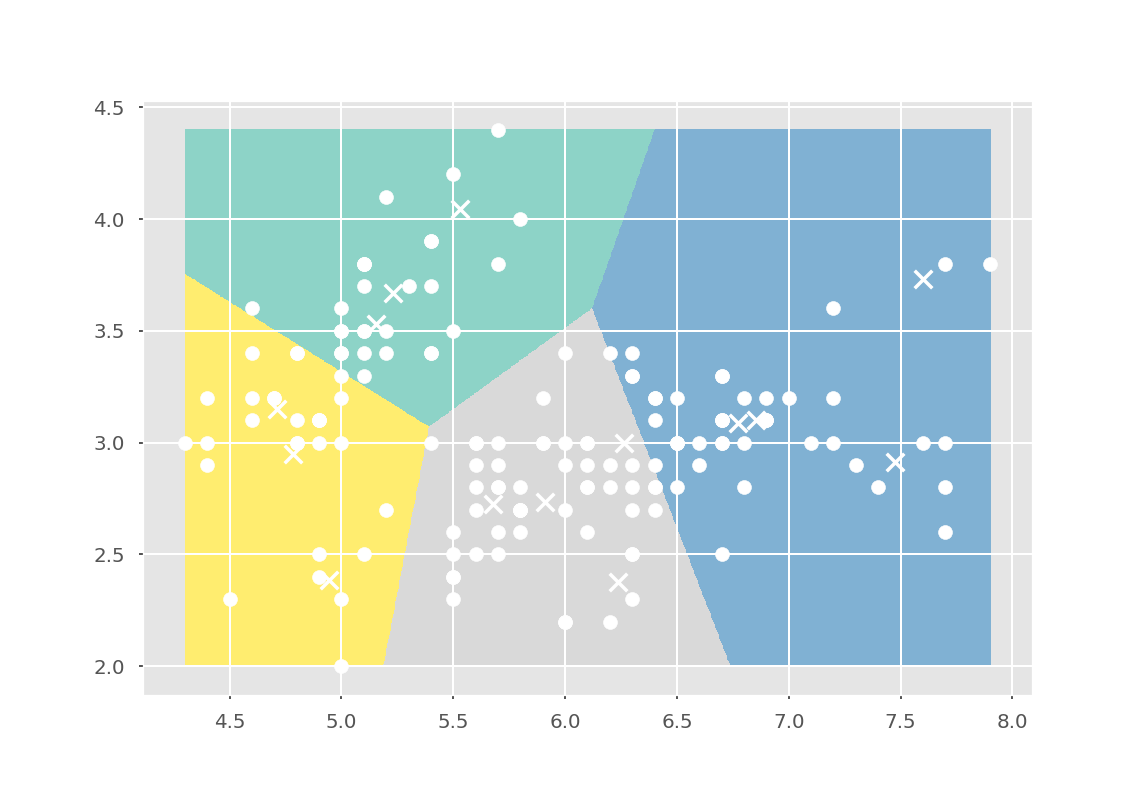

In [20]:
x=10;
fig = plt.figure()
axes = fig.add_subplot(111)
axes.scatter(X[:, 0], X[:, 1], c='w')
km = KMeans(n_clusters=x); km.fit(X)
# plot what each region would be labelled as
x = np.linspace(X[:,0].min(), X[:,0].max(), 1000); y = np.linspace(X[:,1].min(), X[:,1].max(), 1000); 
xs, ys = np.meshgrid(x, y)
zs = km.predict(np.asarray([xs.flatten(), ys.flatten()]).T)
axes.imshow(zs.reshape(xs.shape), extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap=plt.cm.Set3)
# plot centroids
means = km.cluster_centers_
means_plot = axes.scatter(means[:,0], means[:,1], s=200, marker='x', c='w', linewidths=5)

## if you're running on codio, try with different values of "k"

In [21]:
means_plot = None
@interact(x=(1, 10))
def interact_kmeans(x=5):
    # use x as k, the number of centroids
    global means_plot
    # pass back centroids handler so that we can redraw when x changes
    means_plot = plot_kmeans(x, means_plot)
    


A Jupyter Widget

In [ ]:
means_plot = plot_kmeans(7, means_plot)

## if you're running locally, try with the "interact" widget

# Reinforcement Learning
## Thompson Sampling

In [22]:
def ts(x):
    # x is learning rate
    try:
        axes.lines[0].remove()
    except:
        pass
    theta_1 = 0.8 # true parameter for bernoulli arm 1
    theta_2 = 0.4 # true parameter for bernoulli arm 2
    regrets = [0] # keep track of regrets
    # initialise (beta) priors' parameters
    S_1, S_2 = 1, 1
    F_1, F_2 = 1, 1
    best_arm = 1 if theta_1 > theta_2 else 2
    for t in range(1000):
        theta_hat_1 = np.random.beta(S_1, F_1) # sample from prior 1
        theta_hat_2 = np.random.beta(S_2, F_2) # sample from prior 2
        arm = 1 if theta_hat_1 > theta_hat_2 else 2 # choose "better" arm
        # get reward, update priors' parameters        
        if arm == 1:
            reward = np.random.binomial(1, theta_1)
            S_1 += reward * x 
            F_1 += (1 - reward) * x
        else:
            reward = np.random.binomial(1, theta_2)
            S_2 += (reward) * x
            F_2 += (1 - reward) * x
        # record results
        regrets.append(1 * (best_arm != arm))
    # visualise
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.set_xlabel('t')
    axes.set_ylabel('regret')
    axes.plot(range(len(regrets)), np.cumsum(regrets))
    axes.set_title('Regret vs. time for Bernoulli Bandits, pseudocount='+ str(x))

## running on codio? try with different values

<IPython.core.display.Javascript object>


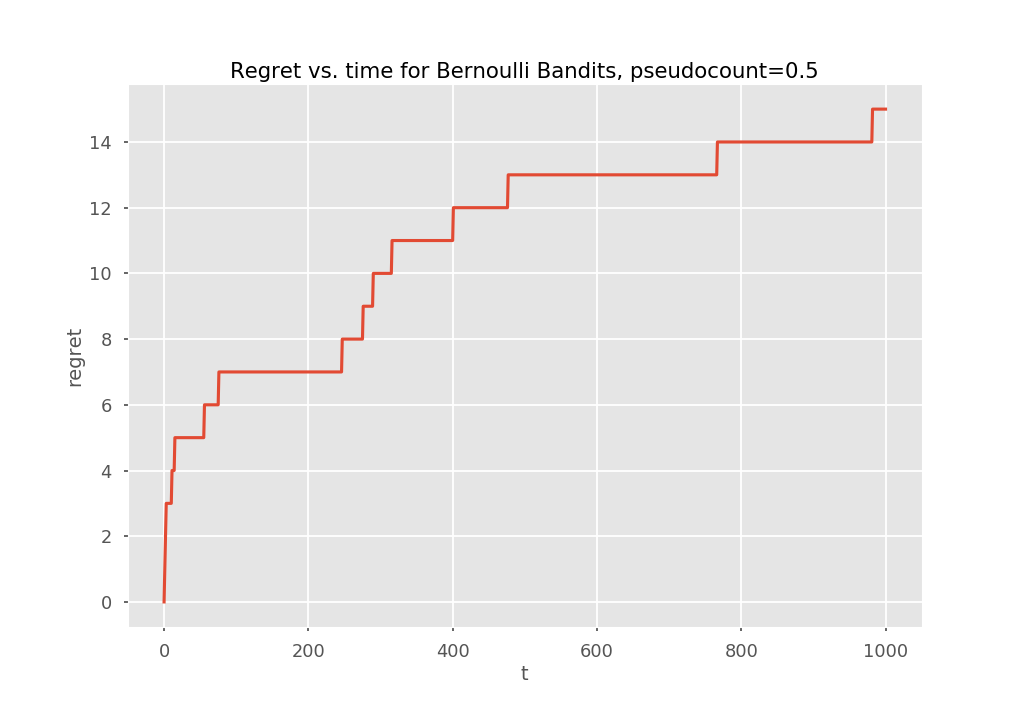

In [32]:
ts(.5)

In [34]:
@interact(x=(1, 10))
def interact_ts(x=1):
    ts(x)

A Jupyter Widget

# more TS vs other approaches

This section written by and used with permission of d.franceschi@columbia.edu

In [36]:
import random
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def TS(A, T, alpha, beta, R):
  

    
    #R= realizations
    #matrix of rewards for every iteration in every realization
    rv = np.zeros(shape=(R,T))   
    #cumulative reward for every realization
    rv_reward = np.zeros(shape=(R,1))
    #average reward for every realization
    rv_avg_reward = np.zeros(shape=(R,1))
    #average reward in timestep t across all the realizations
    rv_avg = np.zeros(T)
    
    rv_regret = np.zeros(T)
    
    
    
    for s in range(R):
    
        #initializing a: arms which were pulled for t=1..T  
        a = np.zeros(T)

        #initializing r: cumulative reward for arm at
        r = np.zeros(A)

        #initializing rbar: avg reward for arm at
        rbar = np.zeros(A)

        #initializing ncount: number of times arm at was pulled
        ncount = np.zeros(A)

        #alpha beta - parmeters of beta distribution
        alpha_array = np.asanyarray([alpha]*A)
        beta_array = np.asanyarray([beta]*A)


        for t in range(T):
            #sampling from beta distribution
            samples = [np.random.beta(alpha_array[i],beta_array[i]) for i in range(A)]
            #argmax to choose action at
            at = np.argmax(samples)

            #calling true bandit
            reward = true_bandit2(A, theta_true2, at)


            #update alpha, beta
            if reward >0:
                alpha_array[at] += 1

            else:
                beta_array[at] += 1


            #updating count, cumulative rewards, arm pulled, and avg reward
            ncount[at] += 1
            r[at]+=reward
            a[t] = at #indicating which arm it was at that iteration
            rbar[at] = r[at] / ncount[at]

            
            rv[s,t] = reward
            
        rv_reward[s] = np.sum(rv[s,:], axis=0)
        
        rv_avg_reward[s] = rv_reward[s]/T
                
        
    for t in range(T):        
        rv_avg[t] = ((np.sum(rv[:,t]))/R)
        rv_regret[t] = 0.75-rv_avg[t]
        
                       
    
    #plots
    #plotting average reward over time
    plt.plot(range(T),rv_avg)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Average Reward', fontsize=16)

    #regret 
    plt.figure()
    plt.plot(range(T),rv_regret)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Regret', fontsize=16)
    


In [38]:
def egreedy(A, T, epsilon, R):

    # R = realizations
    rv = np.zeros(shape=(R,T))   
    rv_reward = np.zeros(shape=(R,1))
    rv_avg_reward = np.zeros(shape=(R,1))
    rv_avg = np.zeros(T)
    
    rv_regret = np.zeros(T)
    
    for s in range(R):

        #initializing a: arms which were pulled for t=1..T  
        a = np.zeros(T)

        #initializing r: cumulative reward for arm at
        r = np.zeros(A)

        #initializing rbar: avg reward for arm at
        rbar = np.zeros(A)

        #initializing ncount: number of times arm at was pulled
        ncount = np.zeros(A)

        #array of A arms from which we will pick randomly an arm epsilon % of the time
        Arms = np.arange(0, A, 1)

        for t in range(T):
            #epsilon greedy algorithm, taking random choice epsilon % of the time
            rand = np.random.random()
            if t == 0:
                at = random.choice(Arms)

            else:
                if rand < epsilon:
                    at = random.choice(Arms)
                #taking greedy action 1-epsilon % of the time    
                else: 
                    at = np.argmax(rbar)

            #calling true bandit
            reward = true_bandit2(A, theta_true2, at)


            #updating count, cumulative rewards, arm pulled, and avg reward
            ncount[at] += 1
            r[at]+=reward
            a[t] = at #indicating which arm it was at that iteration
            rbar[at] = r[at] / ncount[at]
            
            rv[s,t] = reward
            
        rv_reward[s] = np.sum(rv[s,:], axis=0)
        
        rv_avg_reward[s] = rv_reward[s]/T
        
    
    
    for t in range(T):        
        rv_avg[t] = ((np.sum(rv[:,t]))/R)
        rv_regret[t] = 0.75-rv_avg[t]
        
                       
    
    
    #plots
    #plotting average reward over time
    plt.plot(range(T),rv_avg)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Average Reward', fontsize=16)

    #regret 
    plt.figure()
    plt.plot(range(T),rv_regret)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Regret', fontsize=16)
    



In [39]:
#true thetas for each of A arms
theta_true2 = [0.1, 0.2, 0.2, 0.001, 0.25, 0.12, 0.18, 0.75, 0.1, 0.1]

def true_bandit2(A, theta_true2, at):
    
    
    #passing theta true for the particular arm that is being pulled, at
    #pull arm at, observe reward r for arm at
    r = bernoulli.rvs(size=1,p=theta_true2[at])

    return r



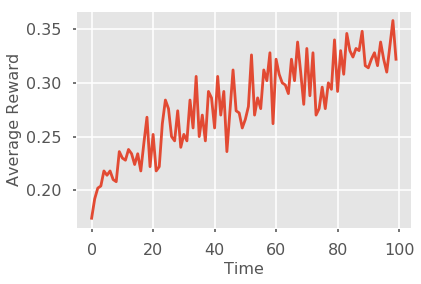

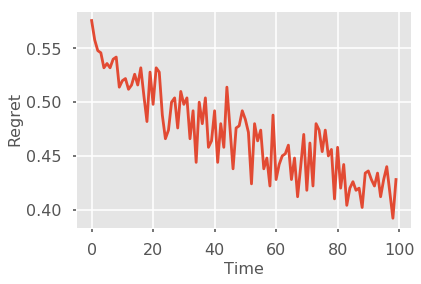

In [40]:
# plot!
TS(10, 100, 100, 10, 500)

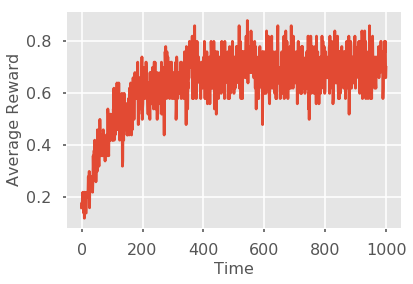

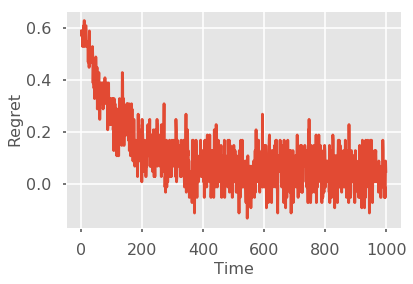

In [41]:
egreedy(10, 1000, 0.1, 50)